# Прогноз оттока клиентов оператора связи

# Описание проекта

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Описание полей данных

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# Цель проекта

Научиться прогнозировать отток клиетов с помощью обученной модели для решения задачи классификации

# Задачи проекта

* Загрузить и изучить данные
* Сделать предобработку данных
* Провести исследовательский анализ данных
* Подготовить данные и обучить модели
* Оценить эффективность лучшей модели на тестовой выборке

# План работы

1) Загрузить и изучить данные:
* Написать краткий вывод

2) Сделать предобработку данных:
* Объединить таблицы в одну
* Проверить наличие и испраить по возможности пропуски/дубликаты/типы данных/выбросы и тд
* Написать обо всех изменениях в выводе.

3) Провести исследовательский анализ данных:
* Написать общий вывод и гипотезы

4) Подготовить данные для обучения модели:
* Выделить целевой признак
* Исследовать корреляцию признаков
* Разделить признаки на обучающую и тестовую выборки
* Написать обо всех именениях в выводе

5) Создать подходящие модели для исследования с оптимизацией гиперпараметров и оценкой кросс-валидации:
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* Сделать сводную таблицу с результатами и написать краткий вывод

6) Исследовать метрику AUC-ROC:
* модели LogisticRegression
* модели DecisionTreeClassifier
* модели RandomForest
* Визуализация графика AUC-ROC
* Вывод

7) Оценить и Accuracy и AUC-ROC лучшей модели на тестовой выборке 

8) Общий вывод

## Загрузим и изучим данные

In [1]:
%pip install phik

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik


from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from catboost import Pool

plt.rcParams["figure.figsize"] = (15,5)

Note: you may need to restart the kernel to use updated packages.


In [2]:
contract1 = 'C:\\Users\\torop\\Downloads\\contract_new.csv'
contract2 = '/datasets/contract_new.csv'

personal1 = 'C:\\Users\\torop\\Downloads\\personal_new.csv'
personal2 = '/datasets/personal_new.csv'

internet1 = 'C:\\Users\\torop\\Downloads\\internet_new.csv'
internet2 = '/datasets/internet_new.csv'

phone1 = 'C:\\Users\\torop\\Downloads\\phone_new.csv'
phone2 = '/datasets/phone_new.csv'

In [3]:
if os.path.exists(contract1):
    contract = pd.read_csv(contract1, parse_dates=['BeginDate'])
    personal = pd.read_csv(personal1)
    internet = pd.read_csv(internet1)
    phone = pd.read_csv(phone1)
elif os.path.exists(contract2):
    contract = pd.read_csv(contract2, parse_dates=['BeginDate'])
    personal = pd.read_csv(personal2)
    internet = pd.read_csv(internet2)
    phone = pd.read_csv(phone2)
else:
    print('Something is wrong')

In [4]:
def preview(df):
    print('Первые 5 строк')
    display(df.head())
    print('-'*28)
    print('Распределение')
    print(df.describe())
    print('-'*28)
    print('Общая информация')
    print(df.info())
    print('-'*28)
    print('Количество пропусков')
    print(df.isna().sum())
    print('-'*28)
    print('Количество дубликатов:', df.duplicated().sum())
    print(df.value_counts().sum())

In [5]:
preview(contract)

Первые 5 строк


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


----------------------------
Распределение
       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
----------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.

Первичный анализ:
1) customerID - Уникальный идентификационный номер

2) BeginDate - Дата начала пользования услугами
* Думаю нужно привести к формату datetime
    
3) EndDate - Дата окончания пользования услугами
* На основании этих значений сформируем целевой признак (если значение "No" - значит клиент действующий)
    
4) Type - Тип оплаты (за год или помесячно)

5) PaperlessBilling - Безналичный расчет

6) PaymentMethod - способ оплаты

7) MonthlyCharges - ежемесяный платеж

8) TotalCharges - общая сумма платежей
* Тип данных object, нужно привести к числовому формату

In [6]:
preview(personal)

Первые 5 строк


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------
Распределение
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
----------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
----------------------------
Количество пропусков
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
----------------------------
Количество дубликатов: 0
7043


Первичный анализ:
1) customerID - Уникальный идентификационный номер

2) gender - пол клиента (Male или Female)

3) SeniorCitizen - пенсионер ( 1- да, 0 - нет)

4) Partner - Семейное положение

5) Dependents - Наличие детей

In [7]:
preview(internet)

Первые 5 строк


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------
Распределение
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     8734-FNWVH     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785  
----------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   I

Первичный анализ:

В таблице информация об использовании сервиса Интернет, если клиента нет в таблице, значит он не испорльзует сервис

In [8]:
preview(phone)

Первые 5 строк


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------
Распределение
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5228-EXCET            No
freq             1          3390
----------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
----------------------------
Количество пропусков
customerID       0
MultipleLines    0
dtype: int64
----------------------------
Количество дубликатов: 0
6361


Первичный анализ:

В таблице информация об использовании сервиса - Телефон, если клиента нет в таблице, значит он не испорльзует сервис

Общий вывод:
Нужно поработать с типом данных и объединить таблицы

## Сделаем предобработку данных

### Объединим таблицы для удобства работы

In [9]:
df = contract.set_index('customerID').join(
    personal.set_index('customerID')).join(
    internet.set_index('customerID')).join(
    phone.set_index('customerID'))
             

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

### Приведем названия столбцов к нижнему и змеиному регистру

Приведем названия столбцов к нижнему и змеиному регистру

In [11]:
df = df.rename(columns={
    'customerID':'customer_id',
    'BeginDate':'Begin_Date',
    'EndDate':'End_Date',
    'PaperlessBilling':'Paperless_Billing',
    'PaymentMethod':'Payment_Method',
    'MonthlyCharges':'Monthly_Charges',
    'TotalCharges' : 'Total_Charges',
    'SeniorCitizen':'Senior_Citizen',
    'InternetService':'Internet_Service',
    'OnlineSecurity':'Online_Security',
    'OnlineBackup':'Online_Backup',
    'DeviceProtection':'Device_Protection',
    'TechSupport' : 'Tech_Support',
    'StreamingTV':'Streaming_TV',
    'StreamingMovies':'Streaming_Movies',
    'MultipleLines':'Multiple_Lines'
})

In [12]:
df.columns = df.columns.str.lower()

Проверим, все ли поменялось

In [13]:
df.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Названия привели в порядок, можно преступать к работе с самими данными

### Исправим типы данных

Так как в столбце total_charges при первичном анализе стоит тип данных object, но не нашли пропуски, предположу что в этом столбце присутствуют неявные пропуски, а именно просто пустые значения. Заменим и попробуем изметить тип данных

In [14]:
df['total_charges'] = df['total_charges'].replace([' '], 0)
df['total_charges'] = df['total_charges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   object        
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   5517 non-null   object        
 12  online_security    5517 non-null   object        
 13  online_backup      5517 non-null   object        
 14

Попробуем выяснить причину пропусков

In [15]:
df.query('total_charges == 0')

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0.0,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0.0,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0.0,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0.0,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0.0,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0.0,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0.0,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0.0,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Как видно из таблицы, все клиенты действоющие, но их немного, поэтому считаю правильным их удалить, чтобы они не влияли на предсказания

In [16]:
df = df.query('total_charges > 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   int64         
 9   partner            7032 non-null   object        
 10  dependents         7032 non-null   object        
 11  internet_service   5512 non-null   object        
 12  online_security    5512 non-null   object        
 13  online_backup      5512 non-null   object        
 14

В столбце end_date присутствуют и даты, и значение 'No'. Этот столбец нам очень важен для определения целевого признака, поэтому считаю необходимым привезти его к формату datetime, а для этого заполним значения No заглушкой - датой сбора датасета. После этого уже поменяем формат на datetime

In [17]:
replacement = '2020-02-02'

In [18]:
df['end_date'] = df['end_date'].replace(['No'], [replacement])
df['end_date'] = pd.to_datetime(df['end_date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   datetime64[ns]
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   int64         
 9   partner            7032 non-null   object        
 10  dependents         7032 non-null   object        
 11  internet_service   5512 non-null   object        
 12  online_security    5512 non-null   object        
 13  online_backup      5512 non-null   object        
 14

### Обработаем пропуски

В столбцах с сервисами появились пропуски, эти абоненты ими не пользуются. Почти все столбцы бинарные с ответами 'Yes' и 'No', кроме столбца internet_service (тип подключения к интерету). Считаю правильным заполнить все пропуски значнием 'No', а по полю internet_service модель сможет определить пользователей интернет услугами


In [20]:
df = df.fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   datetime64[ns]
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7032 non-null   object        
 8   senior_citizen     7032 non-null   int64         
 9   partner            7032 non-null   object        
 10  dependents         7032 non-null   object        
 11  internet_service   7032 non-null   object        
 12  online_security    7032 non-null   object        
 13  online_backup      7032 non-null   object        
 14

## Проведем исследовательский анализ данных

### Создадим  новые признаки

Сразу добавим целевой признак

In [23]:
df['exited'] = (df['end_date'] != replacement)*1
df['exited'].value_counts()

0    5931
1    1101
Name: exited, dtype: int64

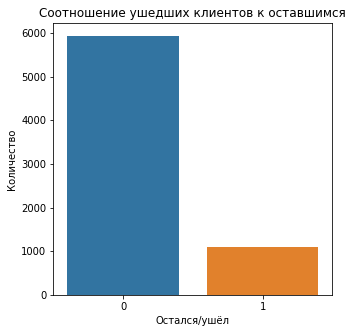

In [24]:
plt.subplots(figsize=(5, 5))
exited = sns.countplot(x=df['exited'])
plt.setp(exited, xlabel='Остался/ушёл', ylabel='Количество', title='Соотношение ушедших клиентов к оставшимся')
plt.show()

In [25]:
print('Процент ушедших клиентов:', 1101/7032*100)

Процент ушедших клиентов: 15.656996587030717


Вывод: 5931 - действующих пользователей, а вот 1101 - ушли. Присутсвует явный дисбаланс классов. Ушло больше 15% клиентов


Создадим столбец с признаком срока обслуживания

In [26]:
df['use_date'] = (df['end_date'] - df['begin_date']).dt.days
df['use_date'] = df['use_date'].astype('int')

### Закодируем признаки

In [27]:
cat = ['type', 'paperless_billing', 'payment_method', 'gender', 
       'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 
      'streaming_tv', 'streaming_movies', 'multiple_lines']
 
num = ['monthly_charges', 'use_date', 'total_charges']


In [28]:
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc.fit(df[cat])
df_cat = pd.DataFrame(
    enc.fit_transform(df[cat]).toarray(),
    columns=enc.get_feature_names(cat),
    index=df.index)

In [29]:
df_ohe = pd.concat((df[num], df_cat, df['exited']), axis = 1)
df_ohe.head(1)

,monthly_charges,use_date,total_charges,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,...,partner_Yes,dependents_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,exited
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,29.85,32,31.04,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


### Проанализируем признаки

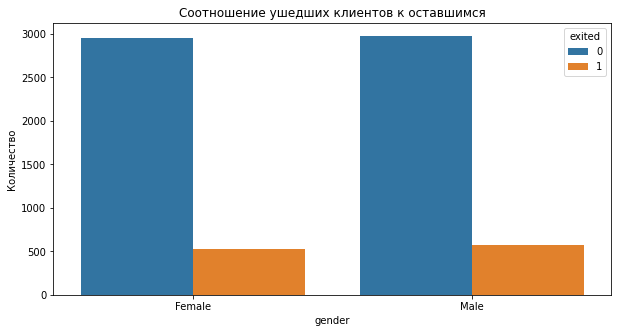

In [30]:
plt.subplots(figsize=(10, 5))
exited = sns.countplot(x=df['gender'], hue='exited', data=df)
plt.setp(exited, ylabel='Количество', title='Соотношение ушедших клиентов к оставшимся')
plt.show()

Вывод: Уход клиента не зависит от гендерной принадлежности

In [31]:
df_ohe.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
use_date,7032.0,900.804750,682.733162,28.00,277.0000,762.000,1461.0000,2315.00
total_charges,7032.0,2118.621822,2112.736199,19.05,439.7450,1345.275,3239.3175,9221.38
type_One year,7032.0,0.209329,0.406858,0.00,0.0000,0.000,0.0000,1.00
type_Two year,7032.0,0.239619,0.426881,0.00,0.0000,0.000,0.0000,1.00
paperless_billing_Yes,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
payment_method_Credit card (automatic),7032.0,0.216297,0.411748,0.00,0.0000,0.000,0.0000,1.00
payment_method_Electronic check,7032.0,0.336320,0.472483,0.00,0.0000,0.000,1.0000,1.00
payment_method_Mailed check,7032.0,0.228100,0.419637,0.00,0.0000,0.000,0.0000,1.00
gender_Male,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00


Вывод:
* 59% клиентов предпочитаю безналичные платежи
* Распределение по гендеру примерно 50/50
* 16% - пенсионеры
* Чуть меньше половины клиентов замужем/женаты
* У 30% клиентов есть еждевенцы

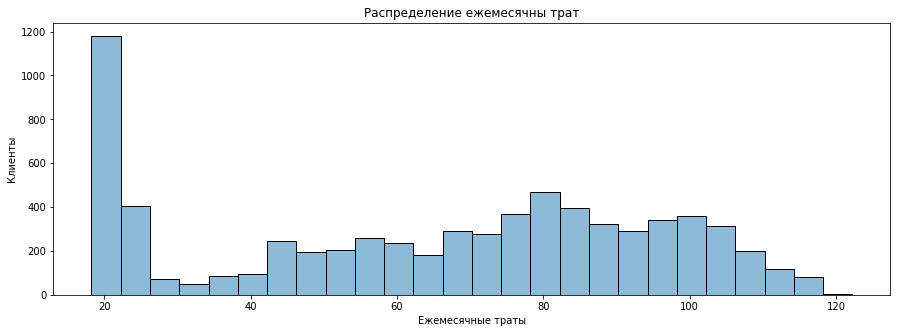

In [32]:
sns.histplot(df['monthly_charges'],
             alpha=0.5, 
             binwidth=4,
             label='Оставшиеся клиенты')
plt.title('Распределение ежемесячны трат')
plt.xlabel('Ежемесячные траты')
plt.ylabel('Клиенты');

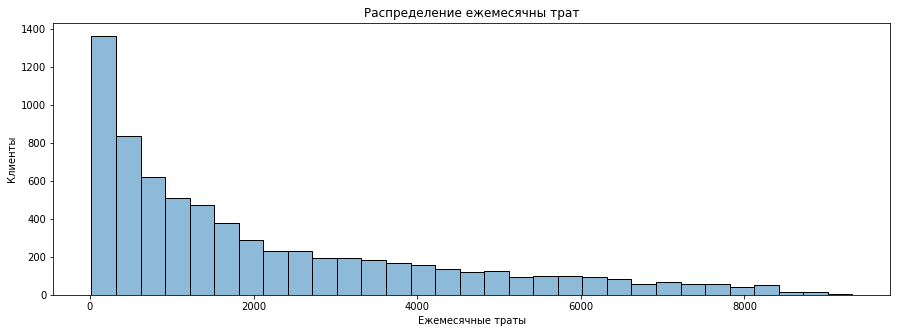

In [33]:
sns.histplot(df['total_charges'],
             alpha=0.5, 
             binwidth=300,
             label='Оставшиеся клиенты')
plt.title('Распределение ежемесячны трат')
plt.xlabel('Ежемесячные траты')
plt.ylabel('Клиенты');

### Исследуем корреляцию признаков

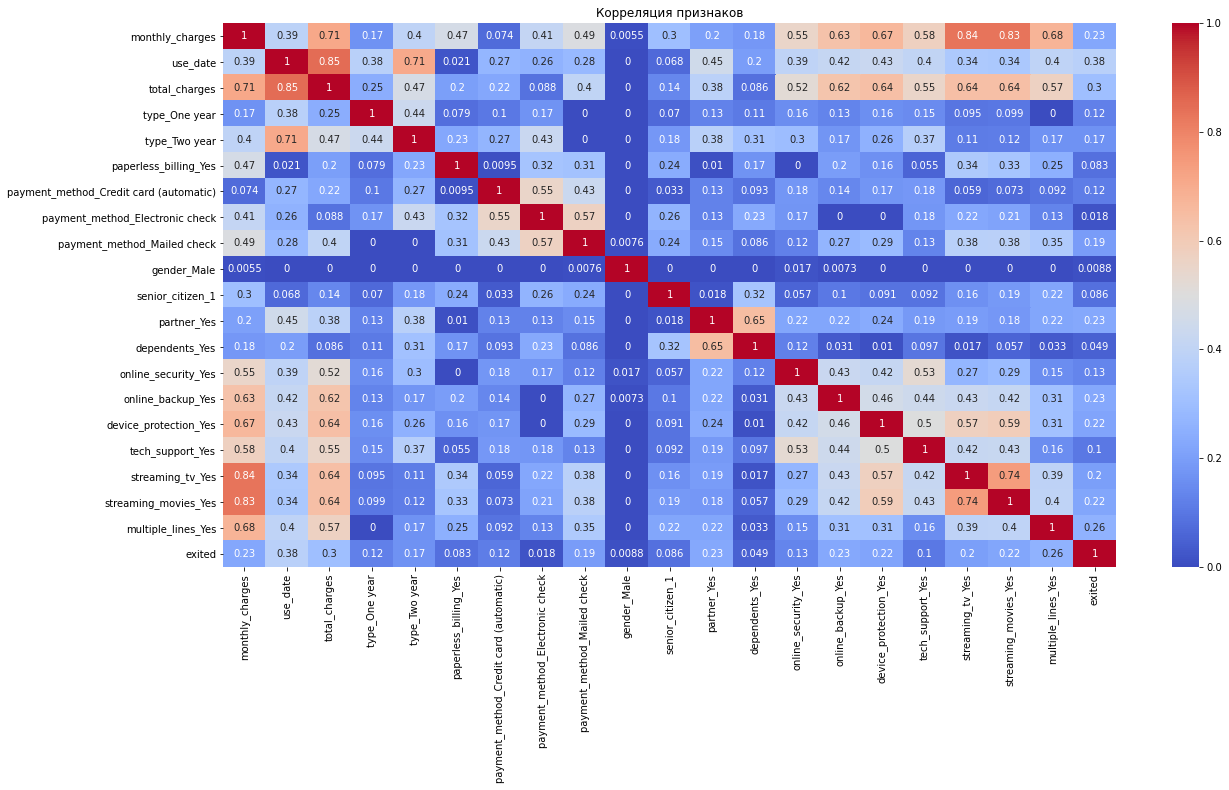

In [34]:
corrMatrix = df_ohe.phik_matrix(interval_cols=num)
plt.figure(figsize=(20, 10))
plt.title('Корреляция признаков')
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm');

Удалим признаки, создающие мультиколлинеарность

In [35]:
df_ohe = df_ohe.drop(['streaming_tv_Yes'], axis=1)
df_ohe = df_ohe.drop(['streaming_movies_Yes'], axis=1)
df_ohe = df_ohe.drop(['total_charges'], axis=1)

Вывод: 
* Наличие сервисов так же влияет на месячную и общую оплату
* Наличие партнера и еждевенцев так же связано
* Уход клиента коррелирует с датой

В целом ничего неожиданного в корреляции данных нет

## Подготовим данные для обучения модели

### Разделим признаки на обучающую и тестовую  4:1

In [36]:
random_state = 240423

In [37]:
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited']

In [38]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=random_state
)

In [39]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(5274, 17)
(5274,)
(1758, 17)
(1758,)


### Стандартизируем непрерывные переменные

In [40]:
cat = ['type', 'paperless_billing', 'payment_method', 'gender', 
       'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 
      'streaming_tv', 'streaming_movies', 'multiple_lines']
 
num = ['monthly_charges', 'use_date']

In [41]:
scaler = StandardScaler().fit(features_train[num])
features_train[num] = scaler.transform(features_train[num])
features_test[num] = scaler.transform(features_test[num])

/tmp/ipykernel_106/363247733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[num] = scaler.transform(features_train[num])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_106/363247733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Закодируем столбцы с категориальными признаками методом OneHotEncoder

## Обучим модели для исследования с оптимизацией гиперпараметров и оценкой кросс-валидации

### LogisticRegression

In [43]:
%%time
model_lr = LogisticRegression(random_state=random_state, solver='liblinear')

scores = cross_val_score(model_lr, X=features, y=target, cv=5, scoring='roc_auc', n_jobs=-1)

print('Средний показатель ROC-AUC на кросс-валидации:', scores.mean())


Средний показатель ROC-AUC на кросс-валидации: 0.7517893360742186
CPU times: user 383 ms, sys: 414 ms, total: 797 ms
Wall time: 775 ms


### DecisionTreeClassifier

In [44]:
dtc = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),
                   {
    'max_depth': range(2,10,2),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [45]:
%%time
dtc.fit(features_train,target_train)
print('Лучшие параметры:', dtc.best_params_)
print('Лучший показатель:', dtc.best_score_)

Лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 24}
Лучший показатель: 0.788718920856388
CPU times: user 7.24 s, sys: 58.4 ms, total: 7.3 s
Wall time: 7.42 s


In [46]:
model_dtc = DecisionTreeClassifier(class_weight = 'balanced',
                                     criterion = 'entropy', 
                                     max_depth=8, 
                                     min_samples_leaf=5, 
                                     min_samples_split=24, 
                                     random_state = random_state)

### RandomForestClassifier

In [47]:
rfc = GridSearchCV(RandomForestClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(2,10,2),
    'n_estimators': range(50,200,50),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [48]:
%%time
rfc.fit(features_train,target_train)
print('Лучшие параметры:', rfc.best_params_)
print('Лучший показатель:', rfc.best_score_)

Лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
Лучший показатель: 0.8267513091499783
CPU times: user 8min 49s, sys: 3.08 s, total: 8min 52s
Wall time: 8min 56s


In [49]:
model_rfc = RandomForestClassifier(class_weight = 'balanced',
                                     criterion = 'entropy', 
                                     max_depth=8, 
                                     min_samples_leaf=5, 
                                     min_samples_split=16, 
                                     n_estimators = 70, 
                                     random_state = random_state)

### CatBoostClassifier

In [50]:
model_cbc = CatBoostClassifier(loss_function = 'CrossEntropy',learning_rate = 0.03, random_state = random_state)
cbc = GridSearchCV(model_cbc,{
    'iterations': [100,200,300,400],
    'learning_rate' : [0.03],
    'depth' : range(2,10,2),
    'verbose' : [False]
}, cv = 5,scoring = 'roc_auc')

In [51]:
%%time
cbc.fit(features_train,target_train)
print('Лучшие параметры:', cbc.best_params_)
print('Лучший показатель:', cbc.best_score_)

Лучшие параметры: {'depth': 6, 'iterations': 400, 'learning_rate': 0.03, 'verbose': False}
Лучший показатель: 0.8768200202559806
CPU times: user 47.7 s, sys: 1.95 s, total: 49.6 s
Wall time: 3min 22s


In [52]:
model_cbc = CatBoostClassifier(loss_function = 'CrossEntropy',
                               iterations = 400, 
                               depth = 6,
                               learning_rate = 0.03, 
                               random_state = random_state)

Вывод: 
Были созданы 4 модели:
* LogisticRegression - Показатель ROC-AUC на кросс-валидации: 0.7517893360742186
* DecisionTreeClassifier - Показатель ROC-AUC на кросс-валидации: 0.7877131318805115
* RandomForestClassifier - Показатель ROC-AUC на кросс-валидации: 0.8267513091499783
* CatBoostClassifier - Показатель ROC-AUC на кросс-валидации: 0.8768200202559806

Лучший результат показала модель CatBoostClassifier. 

## Проверим лучшую модель на тестовой выборке

In [54]:
model_cbc.fit(features_train, target_train)
predicted_cbc = model_cbc.predict(features_test)
probabilities_cbc = model_cbc.predict_proba(features_test)[:, 1]
roc_auc_cbc = roc_auc_score(target_test, probabilities_cbc)

print('ROC-AUC:', roc_auc_cbc)
print('Accuracy',accuracy_score(target_test,predicted_cbc))

0:	learn: 0.6731987	total: 1.24ms	remaining: 493ms
1:	learn: 0.6499432	total: 3.61ms	remaining: 719ms
2:	learn: 0.6282555	total: 5.67ms	remaining: 751ms
3:	learn: 0.6091068	total: 7.57ms	remaining: 749ms
4:	learn: 0.5892092	total: 9.62ms	remaining: 760ms
5:	learn: 0.5703491	total: 11.6ms	remaining: 762ms
6:	learn: 0.5542189	total: 13.6ms	remaining: 764ms
7:	learn: 0.5417572	total: 15.5ms	remaining: 760ms
8:	learn: 0.5265663	total: 17.3ms	remaining: 754ms
9:	learn: 0.5141155	total: 19.3ms	remaining: 753ms
10:	learn: 0.5003629	total: 21.5ms	remaining: 762ms
11:	learn: 0.4912993	total: 23.7ms	remaining: 766ms
12:	learn: 0.4811059	total: 25.5ms	remaining: 760ms
13:	learn: 0.4704290	total: 27.4ms	remaining: 755ms
14:	learn: 0.4600057	total: 29.6ms	remaining: 759ms
15:	learn: 0.4509481	total: 32.2ms	remaining: 773ms
16:	learn: 0.4427517	total: 34.7ms	remaining: 783ms
17:	learn: 0.4353673	total: 37.6ms	remaining: 798ms
18:	learn: 0.4282080	total: 40.1ms	remaining: 805ms
19:	learn: 0.4211417	t

## Визуализация графика ROC-AUC

In [55]:
fpr_cbc,tpr_cbc,thresholds=roc_curve(target_test,probabilities_cbc)

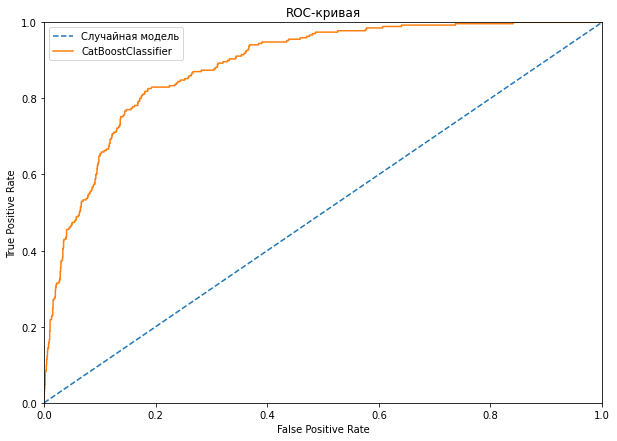

In [56]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_cbc,tpr_cbc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','CatBoostClassifier',),
           loc= 'upper left') 
plt.show()

## Оценим важность признаков

In [57]:
train = Pool(features_train, target_train)
test = Pool(features_test, target_test)

,Feature Id,Importances
0,use_date,46.112992
1,monthly_charges,10.380162
2,type_Two year,7.951756
3,type_One year,4.474035
4,partner_Yes,4.260234
5,multiple_lines_Yes,4.050049
6,payment_method_Mailed check,3.853181
7,online_backup_Yes,3.185846
8,device_protection_Yes,3.135765
9,dependents_Yes,2.281458


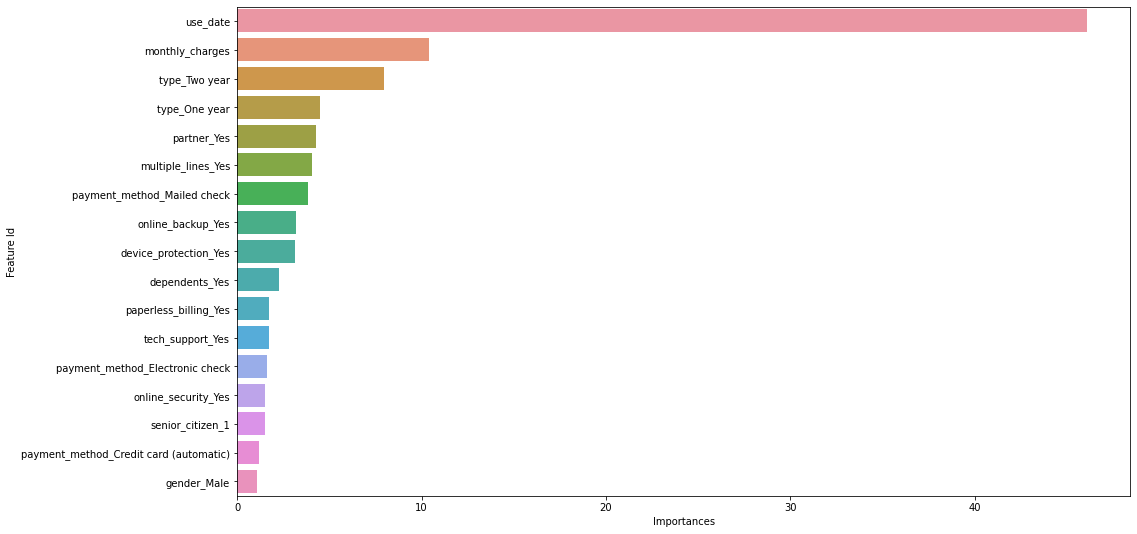

In [59]:
plt.figure(figsize=(16,9))
feature_import = model_cbc.get_feature_importance(train, prettified = True)
sns.barplot(x=feature_import['Importances'], y=feature_import['Feature Id'])
feature_import

Вывод:
* Лучший результат показала модель CatBoostClassifier с метрикой ROC-AUC: 0,88 на тестовой выборке
* График важности признаком показал что созданный признак количества дней нахождения в компании является самым значимым после целевого. Следом идет месячные траты клиентов.

# Отчет

При написании работы были выполненны следующие шаги:
1) **Загрузили и изучили данные**
* contract_new - Основные данные о клиентах
* personal_new - Личные данные клиентов
* internet_new - Данные об использовании сервиса интернет
* phone_new - Данные об использовании свервиса телефон

По результам первичного анализа было выявлено:
* несоответсвие типа данных в столбце TotalCharges, как выяснили позже - это связано с неявными пропусками, а именно, вместно значиния стоял пробел.
* несоответсвие типа данных в столбце BeginDate и EndDate - необходимо привести к формату даты.

2) **Сделали предобработку данных, а именно:**
* Объедили таблицы в одну
* Привели названия столбцов к нижнему и змеиному регистру
* Исправили типы данных
* Обработали пропуски: 
    * Так как все клиенты с пропусками были действующие и их было всего 9, было решено удалить их из таблицы, так как осутсвие этих данных принесет меньший вред для прогноза, чем создание синтетических данных.
    * В столбце end_date присутствуют и даты, и значение 'No', означающее что клиент действующий. Было решено заменить это значение на дату следующего дня, после даты сбора данных, а именно '2020-02-02', чтобы привести формат данных к дате.
    
3) **Провели исследовательский анализ данных:**
* Создали новые признаки:
    * exited - целевой признак, содержит информацию об уходе клиента (1 - ушел / 0 - не ушел). Выяснили, что 5931 - действующих пользователей, а вот 1101 - ушли. Ушло чуть больше 15% клиентов, а значит присутсвует явный дисбаланс классов
    * use_date - содержит количество дней, в течение которых клиент является/являлся клиентом
* Закодировали признаки методом OneHotEncoder для удобного анализа и, в дальнейшем, обучения моделей
* Проанализировали признаки:
    - Уход клиента не зависит от гендерной принадлежности
    - 59% клиентов предпочитаю безналичные платежи
    - Распределение по гендеру примерно 50/50
    - 16% - пенсионеры
    - Чуть меньше половины клиентов замужем/женаты
    - У 30% клиентов есть еждевенцы
* Исследовали корреляцию признаков:
    * В результате исследования было обнаруженно что ряд признаков имеют коэффициент корреляции со значением выше 0.8 - это скоррелированные предикторы, которые создают нам мультиколлинеарность. Так как в проекте используется линейная модель, мы избавились от 3-х призаков (streaming_tv, streaming_movies, total_charges). В остальном ничего неожиданного в корреляции данных не обраружили.
    
4) **Подготовили данные для обучения модели:**
* Выделили целевой признак и разделили данные на обучающую и тестовую в соотношении 4:1
* Стандартизировали непрерывные переменные

5) **Обучили модели для исследования с оптимизацией гиперпараметров и оценкой кросс-валидации**
* LogisticRegression. Средний показатель ROC-AUC на кросс-валидации: 0.7517893360742186
* DecisionTreeClassifier. Применили подбор гиперпараметров GridSearchCV. Лучший показатель ROC-AUC: 0.788718920856388
* RandomForestClassifier. Применили подбор гиперпараметров GridSearchCV. Лучший показатель ROC-AUC: 0.8267513091499783
* CatBoostClassifier. Применили подбор гиперпараметров GridSearchCV. Лучший показатель ROC-AUC: 0.8768200202559806
* В результате луший результат показала модель CatBoostClassifier, с гиперпараметрами: 'depth': 6, 'iterations': 400, 'learning_rate': 0.03

6) **Проверили лучшую модель CatBoostClassifier на тестовой выборке**
* Показатель ROC-AUC: 0.8863761947431301, при этом модель показала точность (Accuracy) = 87%

7) **Сделали визуализацию графика ROC-AUC**

8) **Исследовали важность признаков:**
* В результате исследования выяснили, что самым важным признаком является срок пользования услугами, что логично, ведь чем дольше мы пользуемся услугами, тем меньше вероятность что мы куда то уйдем. Причем вероятность ухода пользователей со сроком от 2-х лет, почти в 2 раза ниже тех, кто является клиентом 1 год. Из чего можно сделать вывод, что стоит обратить внимание на клиентов, котороые обслуживаются меньше 2-х лет
* На втором месте по важности являются ежемесяные расходы. 
* Далее наличие партнера, и подключенные сервисы

В целом при выполнении работы мы придерживались первоначального плана, но по результатам оценки выбранных моделей, из-за недостаточно высоких результатов, было решено добавить еще одну модель, которая показала достойный результат. 
